<a href="https://colab.research.google.com/github/haris-rafique24/mrversatile/blob/circleci-project-setup/FireDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Fire and Smoke Detection Using CNN
This project is developed using Blog at Pyimagesearch https://www.pyimagesearch.com/2019/11/18/fire-and-smoke-detection-with-keras-and-deep-learning/
by Adrian Rosebrock on November 18, 2019

It has been modified and updated by a team under supervision of Sir Ali to increase the accuracy of CNN.
Team members:
Shahkar Ul Hassan
Mehar Un Nisa
Hamda Anees
Haris Rao Ali 



In [ ]:
pip uninstall tensorflow

In [1]:
pip install tensorflow==2.1.0

     |████████████████████████████████| 421.8MB 25kB/s 
     |████████████████████████████████| 450kB 22.6MB/s 
     |████████████████████████████████| 3.9MB 31.8MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=b79d9badf469502fe653290f04d4d061d6ce57ae35d346916b903e8e76bd4ce6
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.10.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorboard 2.2.2
    Uninstalling tensorboard-2.2.2:
      Successfully uninstalled tensorboard-2.2.2
  Found existing installation: 

##Import Libraries and Neural Network Model Class

In [ ]:
import tensorflow as tf
print(tf.__version__)
print(tf.test.gpu_device_name())

2.1.0
/device:GPU:0


In [1]:
# import the necessary packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import SeparableConv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

class FireDetectionNet:
	@staticmethod
	def build(width, height, depth, classes):
		# initialize the model along with the input shape to be
		# "channels last" and the channels dimension itself
		model = Sequential()
		inputShape = (height, width, depth)
		chanDim = -1

		# CONV => RELU => POOL
		model.add(SeparableConv2D(16, (7, 7), padding="same",
			input_shape=inputShape))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(MaxPooling2D(pool_size=(2, 2)))

		# CONV => RELU => POOL
		model.add(SeparableConv2D(32, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(MaxPooling2D(pool_size=(2, 2)))

		# (CONV => RELU) * 2 => POOL
		model.add(SeparableConv2D(64, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(SeparableConv2D(64, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(MaxPooling2D(pool_size=(2, 2)))

		# first set of FC => RELU layers
		model.add(Flatten())
		model.add(Dense(128))
		model.add(Activation("relu"))
		model.add(BatchNormalization())
		model.add(Dropout(0.5))

		# second set of FC => RELU layers
		model.add(Dense(128))
		model.add(Activation("relu"))
		model.add(BatchNormalization())
		model.add(Dropout(0.5))

		# softmax classifier
		model.add(Dense(classes))
		model.add(Activation("softmax"))

		# return the constructed network architecture
		return model
		

Google Drive


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········


TIMEOUT: ignored

##Import Data from Google Drive

In [ ]:

# initialize the path to the fire and non-fire dataset directories
FIRE_PATH = '/content/drive/My Drive/Firedetection/PositiveData'
NON_FIRE_PATH = '/content/drive/My Drive/Firedetection/NegativeData'

# initialize the class labels in the dataset
CLASSES = ["Non-Fire", "Fire"]

# define the size of the training and testing split
TRAIN_SPLIT = 0.8
TEST_SPLIT = 0.2

# define the initial learning rate, batch size, and number of epochs
INIT_LR = 1e-2
BATCH_SIZE = 64
NUM_EPOCHS = 100

# set the path to the serialized model after training
####MODEL_PATH = os.path.sep.join(["output", "fire_detection.model"])

# define the path to the output learning rate finder plot and
# training history plot
####LRFIND_PLOT_PATH = os.path.sep.join(["output", "lrfind_plot.png"])
####TRAINING_PLOT_PATH = os.path.sep.join(["output", "training_plot.png"])

# define the path to the output directory that will store our final
# output with labels/annotations along with the number of iamges to
# sample
####OUTPUT_IMAGE_PATH = os.path.sep.join(["output", "examples"])
SAMPLE_SIZE = 50

In [ ]:
# set the matplotlib backend so figures can be saved in the background
import matplotlib
matplotlib.use("Agg")

# import the necessary packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import sys

def load_dataset(datasetPath):
	# grab the paths to all images in our dataset directory, then
	# initialize our lists of images
	imagePaths = list(paths.list_images(datasetPath))
	data = []

	# loop over the image paths
	for imagePath in imagePaths:
		# load the image and resize it to be a fixed 128x128 pixels,
		# ignoring aspect ratio
		image = cv2.imread(imagePath)
		image = cv2.resize(image, (128, 128))

		# add the image to the data lists
		data.append(image)

	# return the data list as a NumPy array
	return np.array(data, dtype="float32")

# construct the argument parser and parse the arguments
#ap = argparse.ArgumentParser()
#ap.add_argument("-f", "--lr-find", type=int, default=0,
#	help="whether or not to find optimal learning rate")
#args = vars(ap.parse_args())

# load the fire and non-fire images
print("[INFO] loading data...")
fireData = load_dataset( FIRE_PATH)
nonFireData = load_dataset( NON_FIRE_PATH)
print("[INFO] Completed")

[INFO] loading data...


##Preprocessing and Exploring Dataset

In [ ]:
print(fireData.shape)
print(nonFireData.shape)

(1008, 128, 128, 3)
(2693, 128, 128, 3)


In [ ]:
# construct the class labels for the data
fireLabels = np.ones((fireData.shape[0],))
nonFireLabels = np.zeros((nonFireData.shape[0],))
# stack the fire data with the non-fire data, then scale the data
# to the range [0, 1]
data = np.vstack([fireData, nonFireData])
labels = np.hstack([fireLabels, nonFireLabels])


In [ ]:
data /= 255
# perform one-hot encoding on the labels and account for skew in the
# labeled data
labels = to_categorical(labels, num_classes=2)
classTotals = labels.sum(axis=0)
classWeight = classTotals.max() / classTotals

In [ ]:
print(data.shape)
print(labels.shape)
print(labels[1:])
print(classTotals)

(3701, 128, 128, 3)
(3701, 2)
[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]
[2693. 1008.]


In [ ]:
# construct the training and testing split
(trainX, testX, trainY, testY) = train_test_split(data, labels,
	test_size= TEST_SPLIT, random_state=42)

In [ ]:
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(2960, 128, 128, 3)
(2960, 2)
(741, 128, 128, 3)
(741, 2)


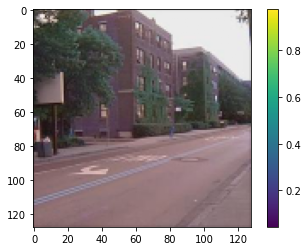

In [ ]:
%matplotlib inline
plt.figure()
plt.imshow(trainX[1])
plt.colorbar()
plt.grid(False)
plt.show()

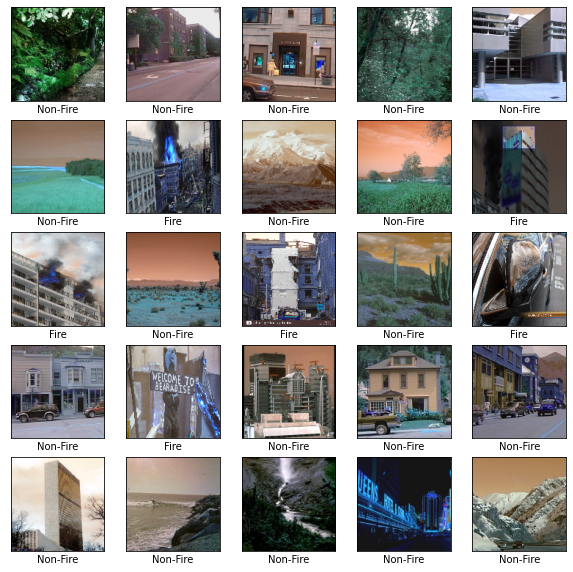

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainX[i], cmap=plt.cm.binary)
    if trainY[i][0] == 1:
      plt.xlabel("Non-Fire")
    else:
      plt.xlabel("Fire")

plt.show()

##Training Model

In [ ]:
# initialize the training data augmentation object
aug = ImageDataGenerator(
	rotation_range=30,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest")

# initialize the optimizer and model
print("[INFO] compiling model...")
opt = SGD(lr= INIT_LR, momentum=0.9,
	decay= INIT_LR /  NUM_EPOCHS)
model = FireDetectionNet.build(width=128, height=128, depth=3,
	classes=2)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])

# check to see if we are attempting to find an optimal learning rate
# before training for the full number of epochs

# train the network
print("[INFO] training network...")
H = model.fit_generator(
	aug.flow(trainX, trainY, batch_size= BATCH_SIZE),
	validation_data=(testX, testY),
	steps_per_epoch=trainX.shape[0] //  BATCH_SIZE,
	epochs= NUM_EPOCHS,
	class_weight=classWeight,
	verbose=1)

# evaluate the network and show a classification report
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size= BATCH_SIZE)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names= CLASSES))

# serialize the model to disk
#print("[INFO] serializing network to '{}'...".format( MODEL_PATH))
#model.save( MODEL_PATH)



[INFO] compiling model...
[INFO] training network...
  ...
    to  
  ['...']
Train for 46 steps, validate on 741 samples
Epoch 1/100
46/46 [==============================] - 16s 356ms/step - loss: 0.6475 - accuracy: 0.7300 - val_loss: 0.6563 - val_accuracy: 0.7058
Epoch 2/100
46/46 [==============================] - 15s 319ms/step - loss: 0.4340 - accuracy: 0.7990 - val_loss: 0.9298 - val_accuracy: 0.7058
Epoch 3/100
46/46 [==============================] - 15s 318ms/step - loss: 0.3899 - accuracy: 0.8125 - val_loss: 1.0690 - val_accuracy: 0.7058
Epoch 4/100
46/46 [==============================] - 14s 315ms/step - loss: 0.3759 - accuracy: 0.8318 - val_loss: 1.1079 - val_accuracy: 0.7058
Epoch 5/100
46/46 [==============================] - 15s 319ms/step - loss: 0.3577 - accuracy: 0.8429 - val_loss: 1.4833 - val_accuracy: 0.7058
Epoch 6/100
46/46 [==============================] - 15s 316ms/step - loss: 0.3355 - accuracy: 0.8470 - val_loss: 1.0965 - val_accuracy: 0.7058
Epoch 7/100
46

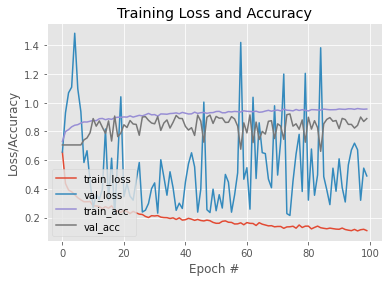

In [ ]:
%matplotlib inline
#import matplotlib.pyplot as plt
#print(H.history["loss"])
#N = np.arange(0,  NUM_EPOCHS)
#print(N)
#plt.plot(N,H.history["loss"])
import matplotlib.pyplot as plt
import numpy as np

N = np.arange(0,  NUM_EPOCHS)
plt.style.use("ggplot")
fig = plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")

In [ ]:
fig.savefig('my_figure.png')

##Exploring Predictions

In [ ]:
print(predictions.shape)
print(predictions[:1])

(741, 2)
[[0.9967031  0.00329689]]


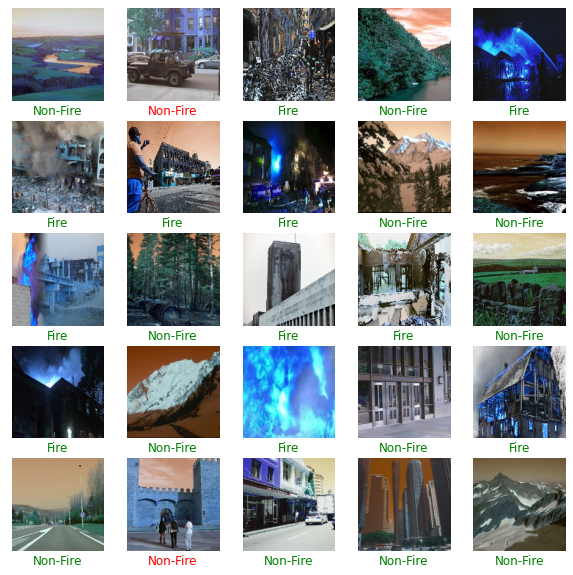

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(testX[i], cmap=plt.cm.binary)
    if testY[i][0] == 1:
      if predictions[i][0] > 0.5:
        plt.xlabel("Non-Fire", color='green')
      else:
        plt.xlabel("Non-Fire", color='red')
    else:
      if predictions[i][1] > 0.5:
        plt.xlabel("Fire", color='green')
      else:
        plt.xlabel("Fire", color='red')

plt.show()

In [ ]:
MODEL_PATH = '/content/drive/My Drive/Colab Notebooks'
model.save( MODEL_PATH)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/assets


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d (SeparableC (None, 128, 128, 16)      211       
_________________________________________________________________
activation (Activation)      (None, 128, 128, 16)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 16)        0         
_________________________________________________________________
separable_conv2d_1 (Separabl (None, 64, 64, 32)        688       
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 32)        1